In [75]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [203]:
er = nx.erdos_renyi_graph(100, 0.037)
# for i in nx.connected_components(er):
#     print(list(i))

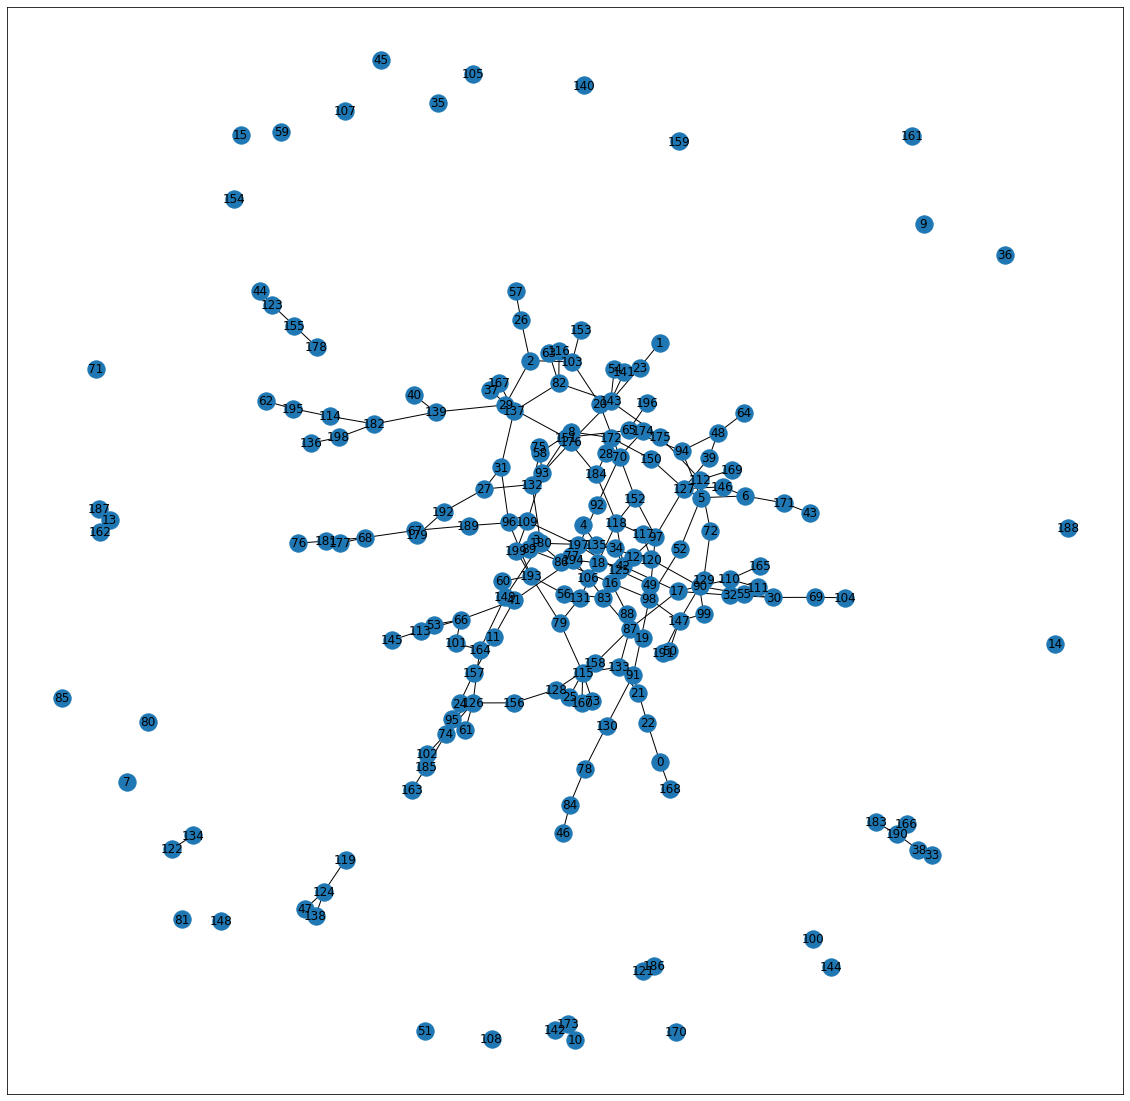

In [202]:
plt.figure(figsize=(20,20))
nx.draw_networkx(er,with_labels=True)

In [171]:
# pos = nx.drawing.layout.shell_layout(er, nlist=[[i for i in range(50)],[i for i in range(50,100)]] ) 

# plt.figure(figsize=(20,10))
# nx.draw(er, pos=pos, with_labels=True)

# Гигантская компонента связности

https://mcnmo.ru/free-books/dubna/raigor-4.pdf   Страница 47
    
    
p << 1/n - нет компоненты

p ~  1/n - поведение неясно - происходит фазовый переход

p >> 1/n - есть что-то похожее на гигантскую компоненту

In [188]:
def max_connected_component(Iters, Nodes, Possib):
    max_component_length=[]
    print("Possibility: {}\n".format(Possib))
    for i in range(Iters):
        if i % 2000 == 0:
            print("Iteration {}".format(i))
        er = nx.erdos_renyi_graph(Nodes, Possib)
        res = [len(q) for q in nx.connected_components(er)]
        max_component_length.append(max(res))

    return(np.mean(max_component_length))

In [189]:
max_connected_component(10000, 200, 1/(200+100))

Possibility: 0.0033333333333333335

Iteration 0
Iteration 2000
Iteration 4000
Iteration 6000
Iteration 8000


11.6058

In [190]:
max_connected_component(10000, 200, 1/(200-100))

Possibility: 0.01

Iteration 0
Iteration 2000
Iteration 4000
Iteration 6000
Iteration 8000


158.5347

In [191]:
max_connected_component(10000, 200, 1/200)

Possibility: 0.005

Iteration 0
Iteration 2000
Iteration 4000
Iteration 6000
Iteration 8000


31.437

Ну, результат наблюдается

Наверное надо позапускать для разных значений(можно для 1000 графов; разное кол-во нод; разная вероятность) и построить график какой-нибудь.

За 10000 иетраций результат примерно тот же как и для 1000, но 10000 более информативны 

# Коэффициент кластеризации

Из лекций:

Коэффициент кластеризации в графе Эрдеша-Реньи равен p.

Матожидание коэффициента кластеризации в данной модели тоже равно p.

In [194]:
def clastering_coeff(Iters,Nodes,Possib):
    diff_btw_values=[]
    print("Possibility: {}\n".format(Possib))
    for i in range(Iters):
        if i % 2000 == 0:
            print("Iteration {}".format(i))
        er = nx.erdos_renyi_graph(Nodes, Possib)
        res = abs(nx.average_clustering(er) - Possib)
        diff_btw_values.append(res)

    return(np.mean(diff_btw_values))

In [195]:
clastering_coeff(10000,200,0.01)

Possibility: 0.01

Iteration 0
Iteration 2000
Iteration 4000
Iteration 6000
Iteration 8000


0.006245715873015872

Средняя разница за 10000 итераций между коэффициентом кластеризации в графе и p равна 0.006

Результат наблюдается.

1) Можно посчитать L2 ошибку

2) Построить графиков